<a href="https://colab.research.google.com/github/kj1103/AI---testy/blob/main/pricing_gboost_i_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np

# Ustawienie losowości
np.random.seed(42)

# Liczba rekordów
n_samples = 200

# Tworzymy dane
data = {
    "price": np.random.uniform(80, 120, n_samples),  # ceny od 80 do 120
    "discount": np.random.uniform(0, 10, n_samples),  # zniżki 0-10%
    "competitor_price": np.random.uniform(85, 115, n_samples),
    "marketing_spend": np.random.uniform(1000, 10000, n_samples),
    "month": np.random.randint(1, 13, n_samples),
}

df = pd.DataFrame(data)

# Tworzymy zmienną celu - sztuczna formuła sprzedaży
df["sales_volume"] = (
    5000
    - 30 * df["price"]
    + 0.05 * df["marketing_spend"]
    - 10 * df["discount"]
    + 20 * (df["competitor_price"] - df["price"])
    + np.random.normal(0, 100, n_samples)
).astype(int)

# Zapis do pliku CSV
df.to_csv("simulated_sales_data.csv", index=False)

# Podgląd danych
print(df.head())


        price  discount  competitor_price  marketing_spend  month  \
0   94.981605  6.420316         88.093716      2520.415568      8   
1  118.028572  0.841400        112.076587      3507.313051     10   
2  109.279758  1.616287        100.157571      2593.094358      1   
3  103.946339  8.985542        109.793724      1798.322804     12   
4   86.240746  6.064291         94.601488      2085.722840     10   

   sales_volume  
0          2091  
1          1488  
2          1654  
3          2033  
4          2569  


RMSE: 188.76


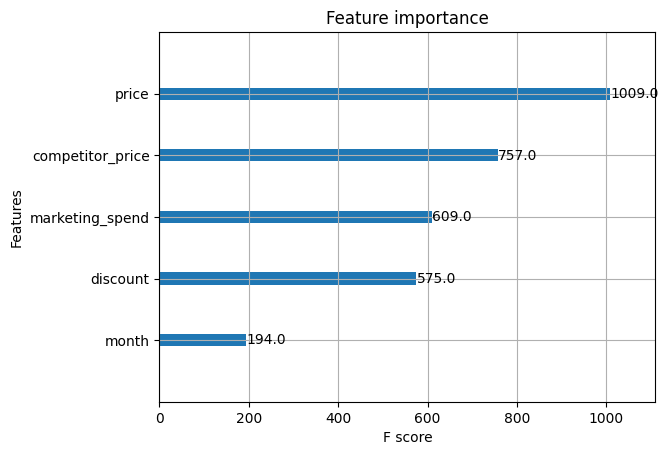

In [4]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 1. Wczytaj dane
#df = pd.read_csv("sales_data.csv")

# 2. Wybierz zmienne
features = ['price', 'discount', 'competitor_price', 'marketing_spend', 'month']
X = df[features]
y = df['sales_volume']

# 3. Podziel dane
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Zbuduj model XGBoost
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)

# 5. Ocena modelu
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"RMSE: {mse ** 0.5:.2f}")

# 6. Wpływ cech (importance)
xgb.plot_importance(model)
plt.show()


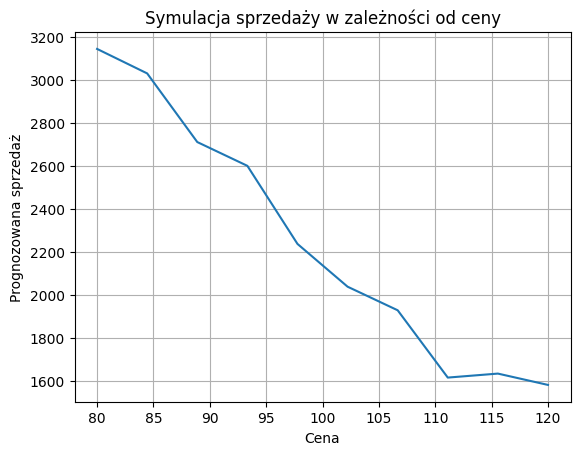

In [5]:
import numpy as np

# Przykład: jak zmienia się sprzedaż przy różnych cenach
price_range = np.linspace(80, 120, 10)  # od 80 do 120 w krokach
simulated_data = pd.DataFrame({
    'price': price_range,
    'discount': 0,
    'competitor_price': 100,
    'marketing_spend': 5000,
    'month': 4
})

simulated_sales = model.predict(simulated_data)

# Wykres
plt.plot(price_range, simulated_sales)
plt.xlabel('Cena')
plt.ylabel('Prognozowana sprzedaż')
plt.title('Symulacja sprzedaży w zależności od ceny')
plt.grid(True)
plt.show()


Policzyć przychody revenue = price * predicted_sales

Obliczyć marżę margin = (price - cost) * predicted_sales

Znaleźć cenę maksymalizującą przychód lub marżę

Przeprowadzić takie symulacje osobno dla różnych regionów, kanałów, kategorii

RMSE: 185.30
price: 0.89
discount: 0.01
competitor_price: 0.06
marketing_spend: 0.04
month: 0.00


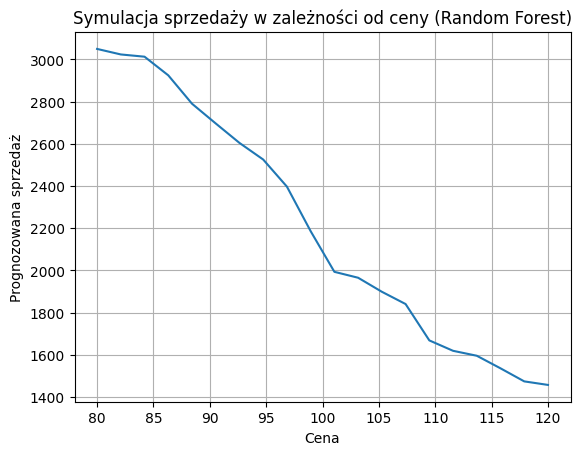

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# 1. Wczytaj dane
df = pd.read_csv("simulated_sales_data.csv")

# 2. Wybór cech i zmiennej celu
features = ['price', 'discount', 'competitor_price', 'marketing_spend', 'month']
X = df[features]
y = df['sales_volume']

# 3. Podział danych
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Trenowanie modelu
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 5. Ocena modelu
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f"RMSE: {rmse:.2f}")


# 6. Wpływ cech
importances = rf.feature_importances_
for feat, imp in zip(features, importances):
    print(f"{feat}: {imp:.2f}")

# 7. Symulacja: jak sprzedaż zmienia się z ceną
price_range = np.linspace(80, 120, 20)
sim_data = pd.DataFrame({
    'price': price_range,
    'discount': 0,
    'competitor_price': 100,
    'marketing_spend': 5000,
    'month': 4
})
predicted_sales = rf.predict(sim_data)

# 8. Wykres
plt.plot(price_range, predicted_sales)
plt.xlabel("Cena")
plt.ylabel("Prognozowana sprzedaż")
plt.title("Symulacja sprzedaży w zależności od ceny (Random Forest)")
plt.grid(True)
plt.show()


Symuluje sprzedaż przy różnych cenach (na bazie modelu Random Forest),

Oblicza prognozowany przychód (price × predicted_sales),

Rysuje wykres: Cena vs. Przychód,

Znajduje i zaznacza cenę, która maksymalizuje przychód.



🔹 Optymalna cena: 84.21
🔹 Maksymalny prognozowany przychód: 253725.47


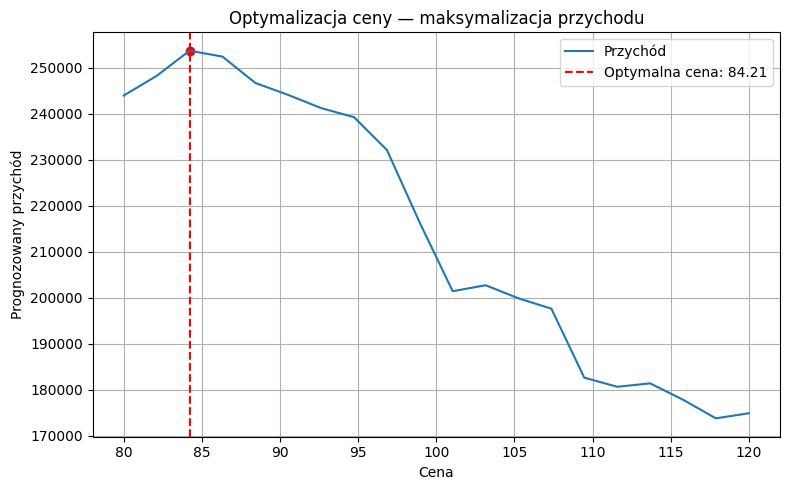

In [8]:
# 9. Obliczanie przychodu
sim_data['predicted_sales'] = predicted_sales
sim_data['revenue'] = sim_data['price'] * sim_data['predicted_sales']

# 10. Znalezienie optymalnej ceny
optimal_row = sim_data.loc[sim_data['revenue'].idxmax()]
optimal_price = optimal_row['price']
max_revenue = optimal_row['revenue']

print(f"🔹 Optymalna cena: {optimal_price:.2f}")
print(f"🔹 Maksymalny prognozowany przychód: {max_revenue:.2f}")

# 11. Wykres przychodu
plt.figure(figsize=(8, 5))
plt.plot(sim_data['price'], sim_data['revenue'], label='Przychód')
plt.axvline(optimal_price, color='red', linestyle='--', label=f'Optymalna cena: {optimal_price:.2f}')
plt.scatter(optimal_price, max_revenue, color='red')
plt.xlabel("Cena")
plt.ylabel("Prognozowany przychód")
plt.title("Optymalizacja ceny — maksymalizacja przychodu")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


4. Automatyczna rekomendacja cen dla wielu produktów
Przykład: masz kilka produktów o różnych kosztach i parametrach. Załóżmy, że chcesz wygenerować rekomendowaną cenę (max zysk).

W tym celu trzeba mieć ramkę danych z informacjami o produktach, np.:

In [9]:
# Lista produktów z różnymi kosztami
product_catalog = pd.DataFrame({
    "product_id": ['A', 'B', 'C'],
    "unit_cost": [60, 75, 90],
    "marketing_spend": [5000, 7000, 4000],
    "competitor_price": [100, 110, 95],
    "discount": [0, 0, 0],
    "month": [4, 4, 4]
})

# Generujemy symulacje dla każdego produktu
recommendations = []

for _, row in product_catalog.iterrows():
    price_range = np.linspace(80, 140, 30)
    sim = pd.DataFrame({
        'price': price_range,
        'discount': row['discount'],
        'competitor_price': row['competitor_price'],
        'marketing_spend': row['marketing_spend'],
        'month': row['month']
    })

    sim['predicted_sales'] = rf.predict(sim[features])
    sim['profit_per_unit'] = sim['price'] - row['unit_cost']
    sim['total_profit'] = sim['profit_per_unit'] * sim['predicted_sales']

    best_row = sim.loc[sim['total_profit'].idxmax()]

    recommendations.append({
        "product_id": row['product_id'],
        "recommended_price": best_row['price'],
        "expected_profit": best_row['total_profit']
    })

# Rekomendacje
recommendation_df = pd.DataFrame(recommendations)
print("\n📦 Rekomendowane ceny:")
print(recommendation_df)




📦 Rekomendowane ceny:
  product_id  recommended_price  expected_profit
0          A              140.0         116620.8
1          B              140.0         109461.3
2          C              140.0          63189.0



💰 Optymalna cena pod kątem marży: 120.00
💰 Maksymalny prognozowany zysk: 72888.00


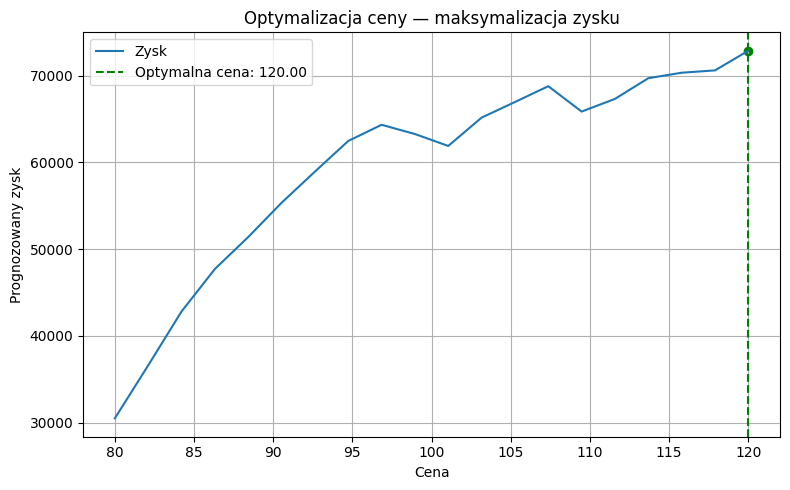

In [10]:
# 2.1 Założony koszt produktu (np. koszt produkcji lub zakupu)
unit_cost = 70

# 2.2 Oblicz marżę i zysk
sim_data['profit_per_unit'] = sim_data['price'] - unit_cost
sim_data['total_profit'] = sim_data['profit_per_unit'] * sim_data['predicted_sales']

# 2.3 Znajdź optymalną cenę pod kątem zysku
optimal_profit_row = sim_data.loc[sim_data['total_profit'].idxmax()]
optimal_profit_price = optimal_profit_row['price']
max_profit = optimal_profit_row['total_profit']

print(f"\n💰 Optymalna cena pod kątem marży: {optimal_profit_price:.2f}")
print(f"💰 Maksymalny prognozowany zysk: {max_profit:.2f}")

# 2.4 Wykres marży (zysku)
plt.figure(figsize=(8, 5))
plt.plot(sim_data['price'], sim_data['total_profit'], label='Zysk')
plt.axvline(optimal_profit_price, color='green', linestyle='--', label=f'Optymalna cena: {optimal_profit_price:.2f}')
plt.scatter(optimal_profit_price, max_profit, color='green')
plt.xlabel("Cena")
plt.ylabel("Prognozowany zysk")
plt.title("Optymalizacja ceny — maksymalizacja zysku")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


✅ 2. Optymalizacja marży (z uwzględnieniem kosztów)
Dodajmy założenie: koszt jednostkowy = 70 (możesz to łatwo zmienić).


💰 Optymalna cena pod kątem marży: 120.00
💰 Maksymalny prognozowany zysk: 72888.00


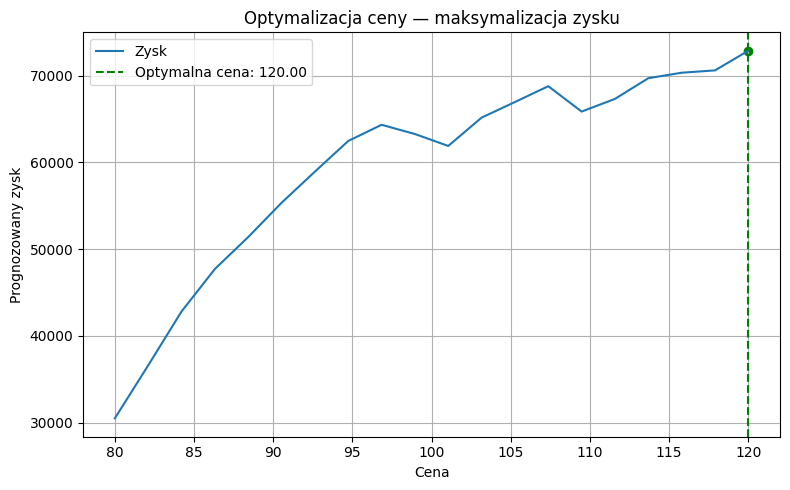

In [11]:
# 2.1 Założony koszt produktu (np. koszt produkcji lub zakupu)
unit_cost = 70

# 2.2 Oblicz marżę i zysk
sim_data['profit_per_unit'] = sim_data['price'] - unit_cost
sim_data['total_profit'] = sim_data['profit_per_unit'] * sim_data['predicted_sales']

# 2.3 Znajdź optymalną cenę pod kątem zysku
optimal_profit_row = sim_data.loc[sim_data['total_profit'].idxmax()]
optimal_profit_price = optimal_profit_row['price']
max_profit = optimal_profit_row['total_profit']

print(f"\n💰 Optymalna cena pod kątem marży: {optimal_profit_price:.2f}")
print(f"💰 Maksymalny prognozowany zysk: {max_profit:.2f}")

# 2.4 Wykres marży (zysku)
plt.figure(figsize=(8, 5))
plt.plot(sim_data['price'], sim_data['total_profit'], label='Zysk')
plt.axvline(optimal_profit_price, color='green', linestyle='--', label=f'Optymalna cena: {optimal_profit_price:.2f}')
plt.scatter(optimal_profit_price, max_profit, color='green')
plt.xlabel("Cena")
plt.ylabel("Prognozowany zysk")
plt.title("Optymalizacja ceny — maksymalizacja zysku")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
